In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Toyota stock data 2025.csv to Toyota stock data 2025.csv


In [3]:
df = pd.read_csv('Toyota stock data 2025.csv')

In [4]:
df.head()

,date,open,high,low,close,adj_close,volume
0,NaN,TM,TM,TM,TM,TM,TM
1,1980-03-17,0.0,3.344743013381958,3.291227102279663,3.291227102279663,1.8489787578582764,41109
2,1980-03-18,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,9343
3,1980-03-19,3.3046059608459473,3.3046059608459473,3.3046059608459473,3.3046059608459473,1.8564950227737427,0
4,1980-03-20,0.0,3.3581221103668213,3.3046059608459473,3.3046059608459473,1.8564950227737427,10277


In [5]:
df.describe()

,date,open,high,low,close,adj_close,volume
count,11413,11414,11414,11414,11414,11414,11414
unique,11413,4894,5798,5787,5950,7757,5826
top,2025-06-26,0.0,7.317633152008057,7.228393077850342,7.228393077850342,4.060840606689453,0
freq,1,2981,37,36,36,36,133


In [6]:
df.shape

(11414, 7)

In [7]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [8]:
# Convert 'date' column to datetime and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Use 'adj_close' column for modeling
data = df['adj_close'].values.reshape(-1, 1)

In [9]:
df['adj_close'].unique()


array(['TM', '1.8489787578582764', '1.8564950227737427', ...,
       '170.8800048828125', '171.5800018310547', '169.14999389648438'],
      dtype=object)

In [10]:
# Remove any commas and convert to numeric
df['adj_close'] = pd.to_numeric(df['adj_close'], errors='coerce')


In [11]:
df.dropna(subset=['adj_close'], inplace=True)

In [12]:
data = df['adj_close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input to [samples, time steps, features] for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 24s 55ms/step - loss: 0.0043
Epoch 2/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - loss: 1.5969e-04
Epoch 3/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - loss: 1.3408e-04
Epoch 4/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - loss: 1.0642e-04
Epoch 5/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 1.0591e-04
Epoch 6/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 8.3874e-05
Epoch 7/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - loss: 6.6974e-05
Epoch 8/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 6.3227e-05
Epoch 9/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 5.4499e-05
Epoch 10/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 4.5770e-05
Epoch 11/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 4.7558e-05
Epoch 12/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - loss: 5.8031e-05
Epoch 13/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 3.7301e-05
Epoch 14/20
355/355 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/s

355/355 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step


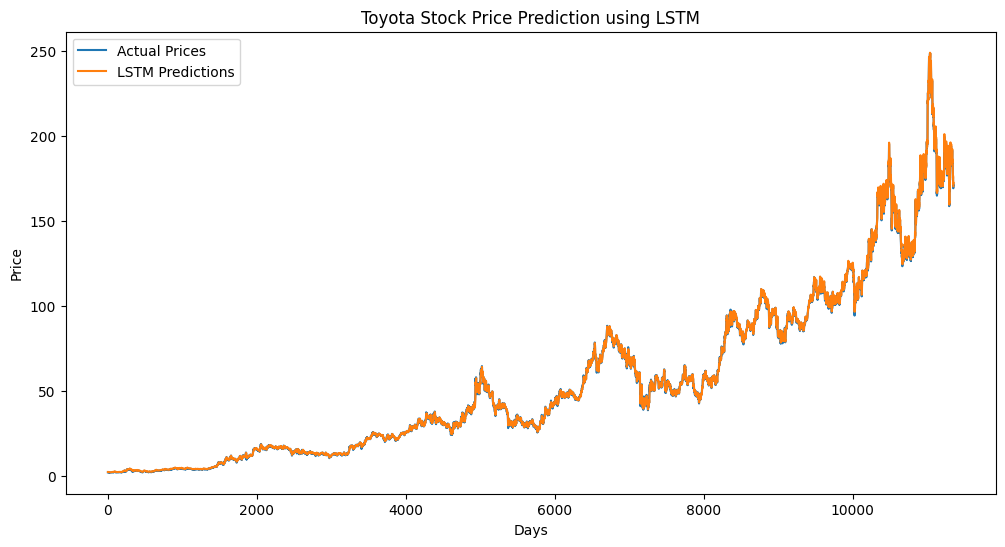

In [16]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y.reshape(-1, 1))

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual Prices')
plt.plot(predicted, label='LSTM Predictions')
plt.title('Toyota Stock Price Prediction using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)


RMSE: 1.2155670992472152


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(actual, predicted)
print("LSTM R² Score:", r2)


LSTM R² Score: 0.999397655716129


In [19]:
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]


In [20]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)




Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.0013
Epoch 2/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 4.5706e-05
Epoch 3/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 4.0769e-05
Epoch 4/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 3.8787e-05
Epoch 5/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 3.1032e-05
Epoch 6/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 2.8102e-05
Epoch 7/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 2.7539e-05
Epoch 8/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 2.3449e-05
Epoch 9/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 2.0592e-05
Epoch 10/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 2.6435e-05
Epoch 11/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 2.0778e-05
Epoch 12/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 1.8697e-05
Epoch 13/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 2.2302e-05
Epoch 14/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss:

In [22]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_test = scaler.inverse_transform(y_test.reshape(-1, 1))


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math

lstm_rmse_test = math.sqrt(mean_squared_error(actual_test, predictions))
lstm_r2_test = r2_score(actual_test, predictions)

print("Test RMSE (LSTM):", lstm_rmse_test)
print("Test R² (LSTM):", lstm_r2_test)


Test RMSE (LSTM): 2.7519154087147584
Test R² (LSTM): 0.9942504207579103


In [24]:
# Start with the last 60 values from the entire dataset
last_60 = scaled_data[-60:].reshape(1, 60, 1)


In [25]:
future_predictions = []

input_seq = last_60.copy()

for _ in range(10):
    # Predict the next value
    next_pred = model.predict(input_seq)[0][0]
    future_predictions.append(next_pred)

    # Update the input sequence
    next_input = np.append(input_seq[:,1:,:], [[[next_pred]]], axis=1)
    input_seq = next_input


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [26]:
# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


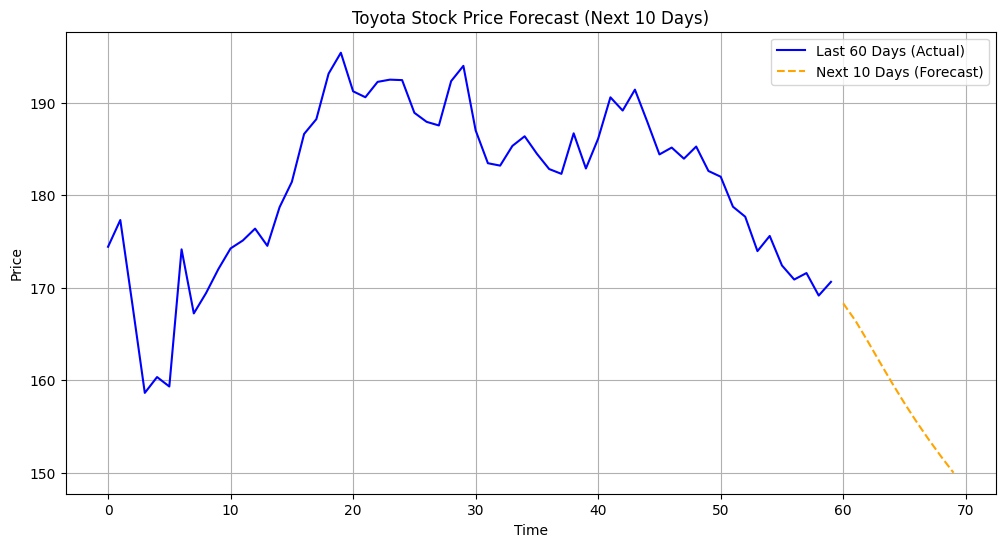

In [27]:
# Plotting last part of actual + next 10 predicted
import matplotlib.pyplot as plt

# Create x-axis labels
future_days = [f'Day {i+1}' for i in range(10)]

# Plot actual recent prices
recent_actual = scaler.inverse_transform(scaled_data[-60:])
plt.figure(figsize=(12,6))
plt.plot(range(60), recent_actual, label='Last 60 Days (Actual)', color='blue')

# Plot future predictions
plt.plot(range(60, 70), future_predictions, label='Next 10 Days (Forecast)', color='orange', linestyle='dashed')
plt.title('Toyota Stock Price Forecast (Next 10 Days)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
model.save('lstm_toyota_model.keras')